In [1]:
! aws s3 ls dev-et-data/t50n-90e/2002/

2020-05-12 20:58:39   60043622 2002_t50n_m90e001.tif
2020-05-12 20:58:40   60545075 2002_t50n_m90e002.tif
2020-05-12 20:58:52   60264042 2002_t50n_m90e003.tif
2020-05-12 20:58:43   60202711 2002_t50n_m90e004.tif
2020-05-12 20:58:42   59905128 2002_t50n_m90e005.tif
2020-05-12 20:58:41   60022393 2002_t50n_m90e006.tif
2020-05-12 20:58:51   59860709 2002_t50n_m90e007.tif
2020-05-12 20:58:42   59865009 2002_t50n_m90e008.tif
2020-05-12 20:58:43   59417868 2002_t50n_m90e009.tif
2020-05-12 20:58:45   59793014 2002_t50n_m90e010.tif
2020-05-12 20:58:45   59718410 2002_t50n_m90e011.tif
2020-05-12 20:58:51   59804682 2002_t50n_m90e012.tif
2020-05-12 20:58:49   59612975 2002_t50n_m90e013.tif
2020-05-12 20:58:49   59860281 2002_t50n_m90e014.tif
2020-05-12 20:58:50   59840873 2002_t50n_m90e015.tif
2020-05-12 20:58:44   60006145 2002_t50n_m90e016.tif
2020-05-12 20:58:42   59424211 2002_t50n_m90e017.tif
2020-05-12 20:58:45   59806676 2002_t50n_m90e018.tif
2020-05-12 20:58:53   59603005 2002_t50n_m90e0

2020-05-12 21:03:41   58486577 2002_t50n_m90e208.tif
2020-05-12 21:03:51   57298031 2002_t50n_m90e209.tif
2020-05-12 21:03:49   58145833 2002_t50n_m90e210.tif
2020-05-12 21:03:37   58119834 2002_t50n_m90e211.tif
2020-05-12 21:03:47   58124739 2002_t50n_m90e212.tif
2020-05-12 21:03:47   58004741 2002_t50n_m90e213.tif
2020-05-12 21:03:43   58106955 2002_t50n_m90e214.tif
2020-05-12 21:03:42   58081380 2002_t50n_m90e215.tif
2020-05-12 21:03:44   58086599 2002_t50n_m90e216.tif
2020-05-12 21:03:47   57728275 2002_t50n_m90e217.tif
2020-05-12 21:03:45   58065901 2002_t50n_m90e218.tif
2020-05-12 21:03:54   58038094 2002_t50n_m90e219.tif
2020-05-12 21:03:50   58043897 2002_t50n_m90e220.tif
2020-05-12 21:03:56   57919801 2002_t50n_m90e221.tif
2020-05-12 21:03:49   58019464 2002_t50n_m90e222.tif
2020-05-12 21:03:45   57989502 2002_t50n_m90e223.tif
2020-05-12 21:03:45   57995290 2002_t50n_m90e224.tif
2020-05-12 21:03:54   56939679 2002_t50n_m90e225.tif
2020-05-12 21:03:53   57843939 2002_t50n_m90e2

In [24]:
import rasterio as rio
import xarray as xr
root = '/vsis3/dev-et-data/t50n-90e/'
file_pattern = '_t50n_m90e'

datasets=[]
for year in range(2001,2018+1):
    file = '{}{}/{}{}'.format(root,year,year,file_pattern)
    day=1
    file = file+'{0:03g}'.format(day) + '.tif'
    print (year,file)
    src = rio.open(file)
    print(src.name)
    print(src.shape)
    src.close
    url = file
    name = str(year) + '_day_{0:03g}'.format(day)
    da = xr.open_rasterio(url)
    #print(da)
    da = da.squeeze().drop(labels='band')
    #da = da.expand_dims('year_day')
    #da.assign_coords({"year_day": name})
    coords = da.coords
    coords['year_day'] = name
    da.assign_coords(coords)
    print(coords)
    ds = da.to_dataset(name='da1')
    #print(da)
    datasets.append(ds)

#DS = xr.merge(datasets, join='exact')
#DS = xr.merge(datasets, join='override')

DS = xr.concat(datasets, join='override', dim='year_day')
    

2001 /vsis3/dev-et-data/t50n-90e/2001/2001_t50n_m90e001.tif
/vsis3/dev-et-data/t50n-90e/2001/2001_t50n_m90e001.tif
(4805, 4757)
Coordinates:
  * y         (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
  * x         (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.1 -80.1
    year_day  <U12 '2001_day_001'
2002 /vsis3/dev-et-data/t50n-90e/2002/2002_t50n_m90e001.tif
/vsis3/dev-et-data/t50n-90e/2002/2002_t50n_m90e001.tif
(4805, 4757)
Coordinates:
  * y         (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
  * x         (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.1 -80.1
    year_day  <U12 '2002_day_001'
2003 /vsis3/dev-et-data/t50n-90e/2003/2003_t50n_m90e001.tif
/vsis3/dev-et-data/t50n-90e/2003/2003_t50n_m90e001.tif
(4805, 4757)
Coordinates:
  * y         (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
  * x         (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.1 -80.1
    year_day  <U12 '2003_day_001'
2004 /vsis

In [25]:
DS

<xarray.Dataset>
Dimensions:   (x: 4757, y: 4805, year_day: 18)
Coordinates:
  * x         (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.1 -80.1
  * y         (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
  * year_day  (year_day) object '2001_day_001' '2002_day_001' ... '2018_day_001'
Data variables:
    da1       (year_day, y, x) float32 0.110083334 0.09888958 ... 0.08586528

In [4]:
dir(DS)

['2001_day_001_name',
 '2002_day_001_name',
 '2003_day_001_name',
 '2004_day_001_name',
 '2005_day_001_name',
 '2006_day_001_name',
 '2007_day_001_name',
 '2008_day_001_name',
 '2009_day_001_name',
 '2010_day_001_name',
 '2011_day_001_name',
 '2012_day_001_name',
 '2013_day_001_name',
 '2014_day_001_name',
 '2015_day_001_name',
 '2016_day_001_name',
 '2017_day_001_name',
 '2018_day_001_name',
 '_HANDLED_TYPES',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__div__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattrib

In [5]:
DS.dims

Frozen(SortedKeysDict({'x': 4757, 'y': 4805}))

In [6]:
ary = DS['2017_day_001_name'].values

In [7]:
ary

array([[0.14950208, 0.14318334, 0.1378743 , ..., 0.0851507 , 0.08631736,
        0.08725764],
       [0.14950208, 0.14318334, 0.1378743 , ..., 0.0851507 , 0.08631736,
        0.08725764],
       [0.15311041, 0.1468125 , 0.14065833, ..., 0.0828993 , 0.08418819,
        0.08529792],
       ...,
       [0.33916667, 0.3474396 , 0.35306665, ..., 0.21478958, 0.19803333,
        0.17932361],
       [0.33793473, 0.34804165, 0.35576043, ..., 0.21939027, 0.20554584,
        0.18707362],
       [0.34149513, 0.35091874, 0.35842985, ..., 0.21085139, 0.20048681,
        0.18510348]], dtype=float32)

In [8]:
import matplotlib.pyplot as pyplot
from rasterio.plot import show

def my_plot(array):
    cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r']
    axs=()
    fig, axs = pyplot.subplots(1,8, figsize=(21,21))
    for i in range(0,8):
        show(array, ax=axs[i], cmap=cmaps[i], title=cmaps[i])
    pyplot.show()

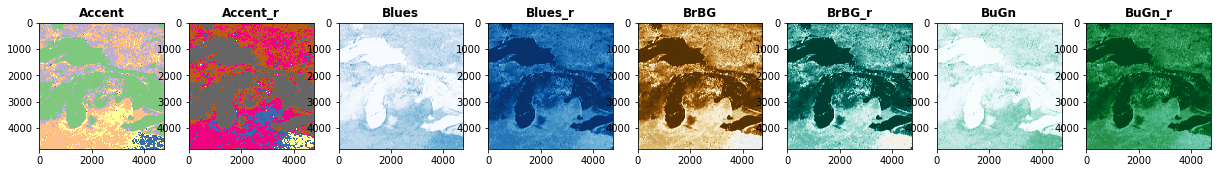

In [9]:
my_plot(ary)

(4805, 4757)


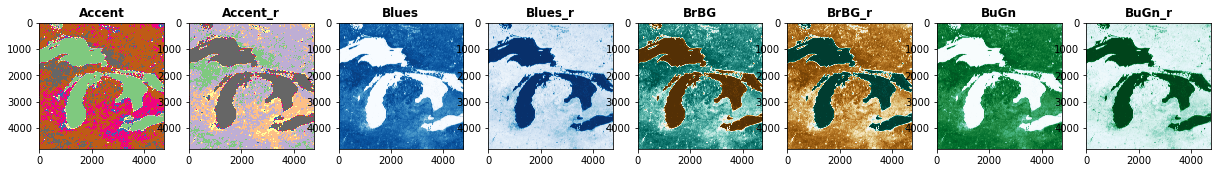

CPU times: user 6.35 s, sys: 838 ms, total: 7.19 s
Wall time: 10.5 s


In [10]:
%%time

tif = '/vsis3/dev-et-data/tony/gl_stripped.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    my_plot(array)

(4805, 4757)


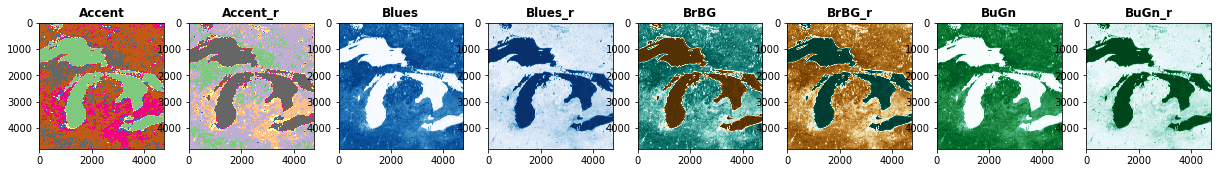

In [11]:
tif = '/vsis3/dev-et-data/t50n-90e/2001/2001_t50n_m90e181.tif'

with rio.open(tif) as src:
    array = src.read(1)  
    print(array.shape)
    my_plot(array)

In [12]:
my_b2_xarray = xr.open_rasterio(tif)

In [13]:
my_b2_xarray

<xarray.DataArray (band: 1, y: 4805, x: 4757)>
[22857385 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
  * x        (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.11 -80.1 -80.1
Attributes:
    transform:      (0.0020810045, 0.0, -90.0, 0.0, -0.0020810045, 49.9)
    crs:            +init=epsg:4326
    res:            (0.0020810045, 0.0020810045)
    is_tiled:       1
    nodatavals:     (-3.4028234663852886e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [14]:
DS

<xarray.Dataset>
Dimensions:            (x: 4757, y: 4805)
Coordinates:
  * x                  (x) float64 -90.0 -90.0 -89.99 ... -80.11 -80.1 -80.1
  * y                  (y) float64 49.9 49.9 49.89 49.89 ... 39.91 39.9 39.9
Data variables:
    2001_day_001_name  (y, x) float32 ...
    2002_day_001_name  (y, x) float32 ...
    2003_day_001_name  (y, x) float32 ...
    2004_day_001_name  (y, x) float32 ...
    2005_day_001_name  (y, x) float32 ...
    2006_day_001_name  (y, x) float32 ...
    2007_day_001_name  (y, x) float32 ...
    2008_day_001_name  (y, x) float32 ...
    2009_day_001_name  (y, x) float32 ...
    2010_day_001_name  (y, x) float32 ...
    2011_day_001_name  (y, x) float32 ...
    2012_day_001_name  (y, x) float32 ...
    2013_day_001_name  (y, x) float32 ...
    2014_day_001_name  (y, x) float32 ...
    2015_day_001_name  (y, x) float32 ...
    2016_day_001_name  (y, x) float32 ...
    2017_day_001_name  (y, x) float32 0.14950208 0.14318334 ... 0.18510348
    2018_day_001_name  (y, x) float32 ...

In [26]:
mean_da = DS.mean(dim='year_day')

In [27]:
mean_da

<xarray.Dataset>
Dimensions:  (x: 4757, y: 4805)
Coordinates:
  * x        (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.11 -80.1 -80.1
  * y        (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
Data variables:
    da1      (y, x) float32 0.092918515 0.08707843 ... 0.254533 0.24678858

In [30]:
ary1 = mean_da['da1'].values

In [31]:
ary1

array([[0.09291852, 0.08707843, 0.08222624, ..., 0.08680069, 0.08860946,
        0.09004969],
       [0.09291852, 0.08707843, 0.08222624, ..., 0.08680069, 0.08860946,
        0.09004969],
       [0.09576447, 0.08921655, 0.08361308, ..., 0.08629267, 0.08848175,
        0.09013423],
       ...,
       [0.1858    , 0.18528865, 0.18521966, ..., 0.265612  , 0.2567351 ,
        0.24960357],
       [0.18631053, 0.18568917, 0.18584217, ..., 0.2653192 , 0.25616002,
        0.24855661],
       [0.18744045, 0.18665425, 0.1868595 , ..., 0.26360494, 0.254533  ,
        0.24678858]], dtype=float32)

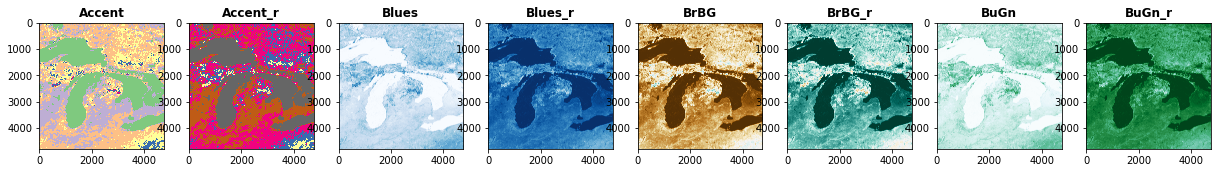

In [34]:
    my_plot(ary1)

In [35]:
max_da = DS.max(dim='year_day')

In [36]:
max_da

<xarray.Dataset>
Dimensions:  (x: 4757, y: 4805)
Coordinates:
  * x        (x) float64 -90.0 -90.0 -89.99 -89.99 ... -80.11 -80.11 -80.1 -80.1
  * y        (y) float64 49.9 49.9 49.89 49.89 49.89 ... 39.91 39.91 39.9 39.9
Data variables:
    da1      (y, x) float32 0.1748375 0.1616618 ... 0.47805 0.47061667

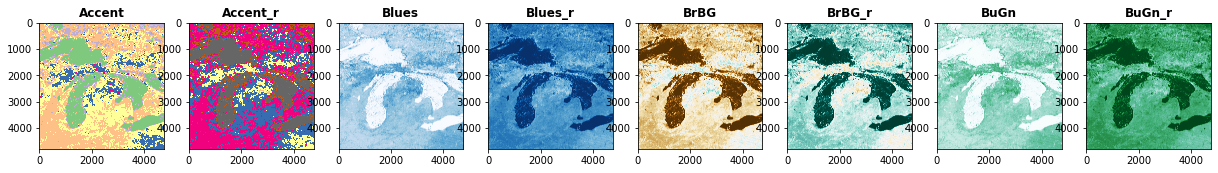

In [38]:
ary2 = max_da['da1'].values
my_plot(ary2)

In [39]:
min_da = DS.min(dim='year_day')

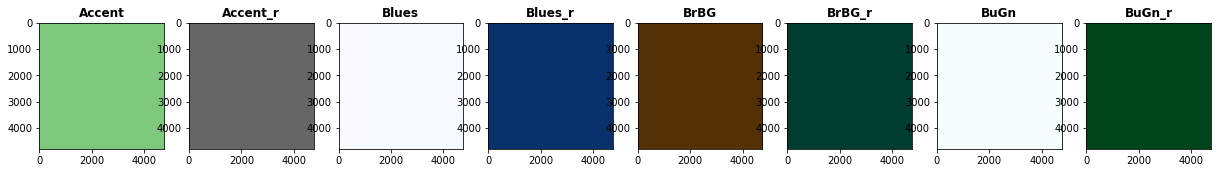

In [40]:
ary3 = min_da['da1'].values
my_plot(ary3)